# Orientation Analysis Plot (Polar coordinates)

In [47]:
# Import required modules

import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

import math

import re 

import pathlib

from pathlib import Path

import scipy

import numpy as np

plt.rcParams['svg.fonttype'] = 'none'

     Orientation  Slice1
0            0.5     305
1            1.5     277
2            2.5     253
3            3.5     255
4            4.5     262
..           ...     ...
175        175.5     737
176        176.5     607
177        177.5     532
178        178.5     427
179        179.5     349

[180 rows x 2 columns]
     Orientation  Slice1
0          180.5     305
1          181.5     277
2          182.5     253
3          183.5     255
4          184.5     262
..           ...     ...
175        355.5     737
176        356.5     607
177        357.5     532
178        358.5     427
179        359.5     349

[180 rows x 2 columns]
     Orientation  Slice1
0            0.5     305
1            1.5     277
2            2.5     253
3            3.5     255
4            4.5     262
..           ...     ...
355        355.5     737
356        356.5     607
357        357.5     532
358        358.5     427
359        359.5     349

[360 rows x 2 columns]
     Orientation  Slice1  Or

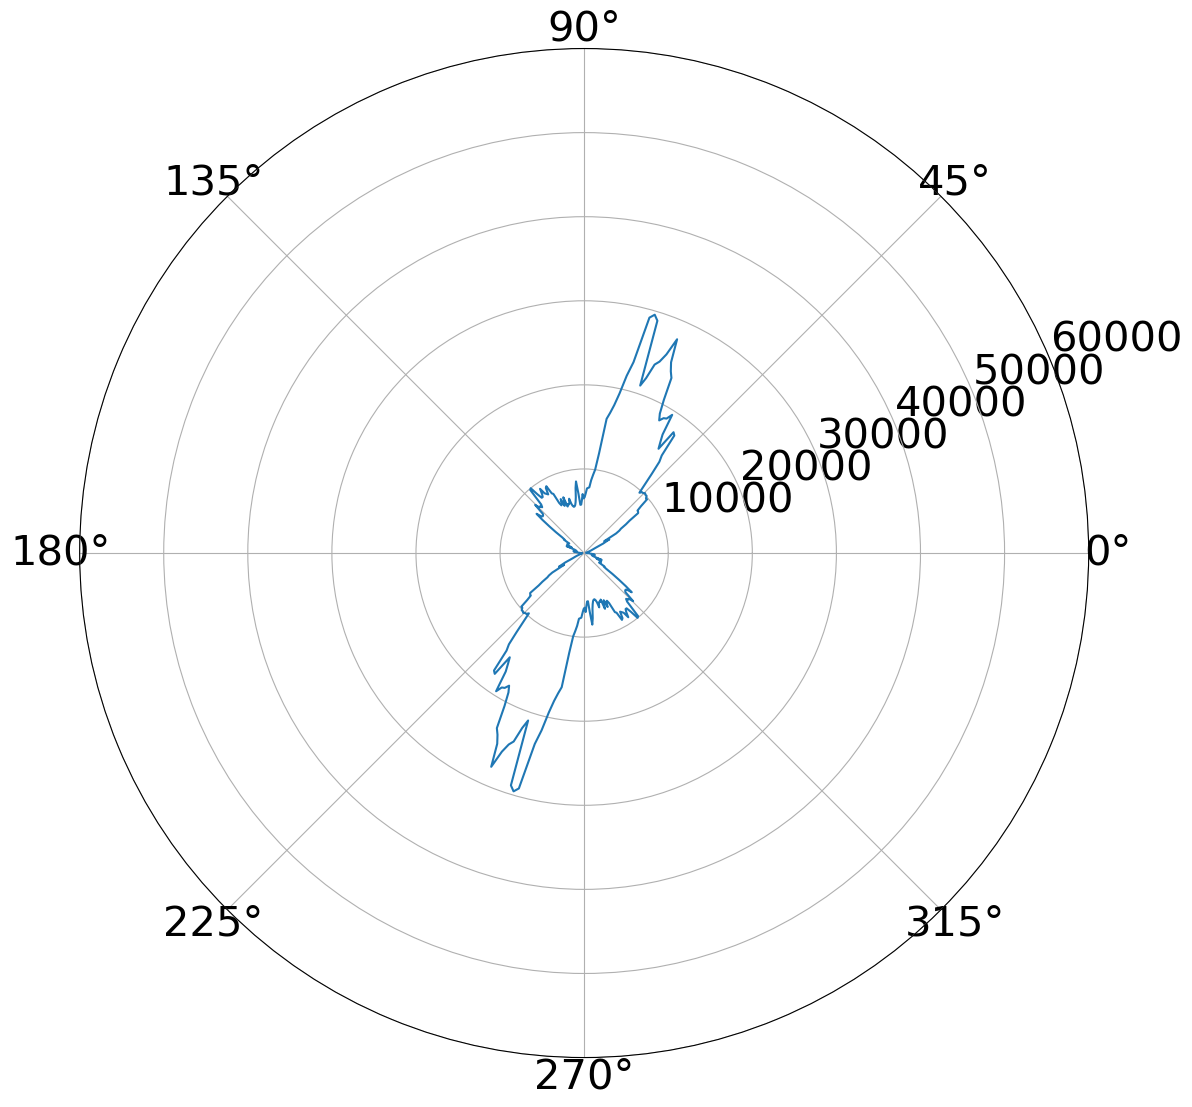

In [21]:
# Import data from filepath

folder_path = Path(r"C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\5. Mechanical Stimulation\Primary\Imaging\Pic Red\analysed\test")

for csv_file in folder_path.glob("*.csv"):

    title = csv_file.stem

    # read in csv file
    df = pd.read_csv(csv_file)

    # df is from -90 to 90, but we want from 0 to 360 to ensure all peaks within datarange
    # first add 90 to original df make it from 0 to 180
    df['Orientation'] = df['Orientation'] + 90

    print(df)

    # duplicat and shift orientaion 180 to generate second half of circular data
    df_copy = df.copy()

    #  add 180 to orientation in copy to make it 180 to 360
    df_copy['Orientation'] = df_copy['Orientation'] + 180 

    print(df_copy)

    
    # append second half of circular data to first
    df_circular = pd.concat([df, df_copy], ignore_index=True)

    print(df_circular)


    # calculate orientation in radians
    df_circular['Orientation_rad'] = df_circular['Orientation'] * (math.pi / 180) 

    print(df_circular)
   

    # Plot data as polar coordinates
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12), subplot_kw={'projection': 'polar'})

    # Set font sizes
    title_fontsize = 40
    label_fontsize = 30
    tick_fontsize = 30

    # Plot for 800 μm
    ax.plot(df_circular['Orientation_rad'], df_circular['Slice1'])
    ax.set_thetamin(0)
    ax.set_thetamax(360)
    ax.set_rmin(0)
    ax.set_rmax(60000)
    ax.tick_params(labelsize=tick_fontsize)

    # Save the figure as SVG
    plt.tight_layout()
    plt.savefig(f'{title}.svg', format='svg')

    # Optional: display the plot in an interactive session
    plt.show()




    # 

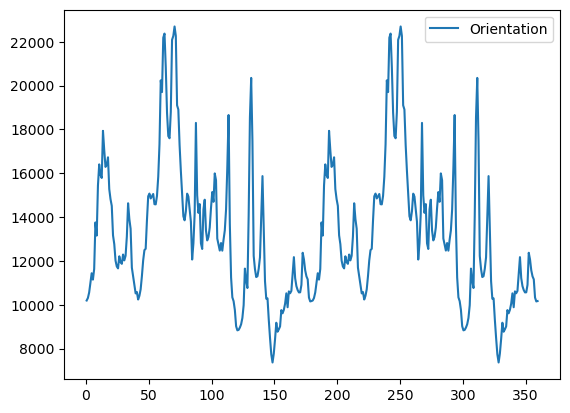

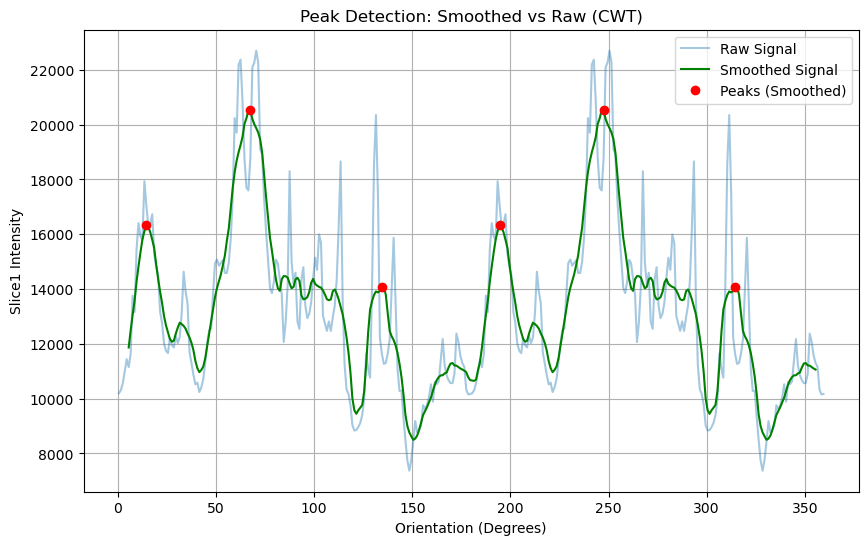

In [79]:
file_path = Path(r"C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\5. Mechanical Stimulation\Primary\Imaging\Pic Red\analysed\test\w137 d28 800 exp tray 4_OJ_Distribution.csv")

df = pd.read_csv(file_path)

# df is from -90 to 90, but we want from 0 to 360 to ensure all peaks within datarange
# first add 90 to original df make it from 0 to 180
df['Orientation'] = df['Orientation'] + 90

# duplicat and shift orientaion 180 to generate second half of circular data
df_copy = df.copy()

#  add 180 to orientation in copy to make it 180 to 360
df_copy['Orientation'] = df_copy['Orientation'] + 180 

# append second half of circular data to first
df_circular = pd.concat([df, df_copy], ignore_index=True)

# calculate orientation in radians
df_circular['Orientation_rad'] = df_circular['Orientation'] * (math.pi / 180)

fig, ax = plt.subplots()

ax.plot(df_circular['Orientation'], df_circular['Slice1'])
ax.legend(labels=df_circular)

plt.show()


# smooth signal
window_size = 10
df_circular['Slice1_smooth'] = df_circular['Slice1'].rolling(window=window_size, center=True).mean()

# find peaks from data
# compare find_peaks of smoothed data, to find_peaks_cwt of raw data
# find peaks in smoothed signal
peaks, props = scipy.signal.find_peaks(df_circular['Slice1_smooth'], distance=45, height=0.0)

# # find peaks in noisy signal using wavelet decomposition
# cwt_peaks = scipy.signal.find_peaks_cwt(df_circular['Slice1'], widths=np.arange(5,15))

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot raw signal
ax.plot(df_circular['Orientation'], df_circular['Slice1'], label='Raw Signal', alpha=0.4)

# Plot smoothed signal
ax.plot(df_circular['Orientation'], df_circular['Slice1_smooth'], label='Smoothed Signal', color='green')

# Plot peaks from smoothed signal
ax.plot(df_circular['Orientation'].iloc[peaks],
        df_circular['Slice1_smooth'].iloc[peaks],
        'ro', label='Peaks (Smoothed)')

# # Plot peaks from raw signal (CWT)
# ax.plot(df_circular['Orientation'].iloc[cwt_peaks],
#         df_circular['Slice1'].iloc[cwt_peaks],
#         'bx', label='Peaks (Raw via CWT)', markersize=8)

# Decorations
ax.set_xlabel('Orientation (Degrees)')
ax.set_ylabel('Slice1 Intensity')
ax.set_title('Peak Detection: Smoothed vs Raw (CWT)')
ax.legend()
ax.grid(True)

plt.show()


# Plot all data on same graph 

C:\Users\mbgm4fs3\AppData\Local\Temp\ipykernel_18192\1303790554.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect to make room for the colorbar


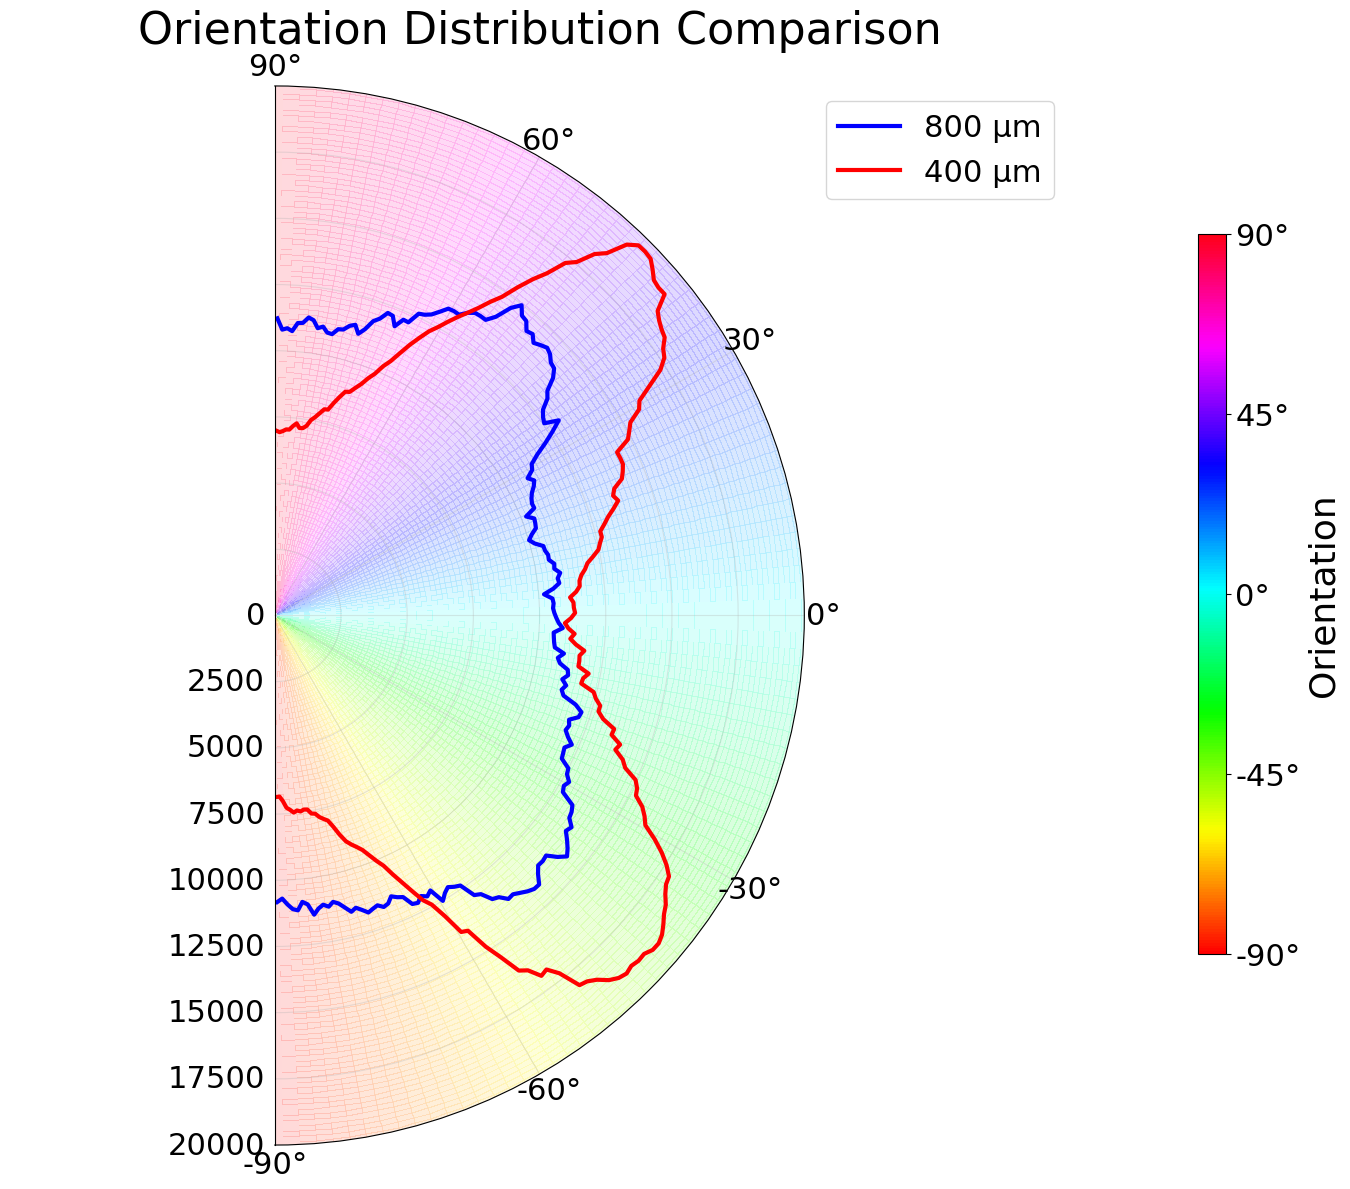

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math

# Import data from filepath
df = pd.read_csv(r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\3. Static Culture\Y201\OrientationJ\800d28y201_orientation_distribution.csv')
df['Direction'] = df['Direction'] * (math.pi / 180)

df_400 = pd.read_csv(r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\3. Static Culture\Y201\OrientationJ\400d28y201_orientation_distribution.csv')
df_400['Direction'] = df_400['Direction'] * (math.pi / 180)

# Create a function to generate the OrientationJ-style colormap background
def add_orientation_colormap(ax, rmax):
    # Create a meshgrid for the background
    r = np.linspace(0, rmax, 100)
    theta = np.linspace(-np.pi/2, np.pi/2, 100)
    R, T = np.meshgrid(r, theta)
    
    # Normalize angles from [-pi/2, pi/2] to [0, 1] for HSV
    norm_angle = (T + np.pi/2) / np.pi
    
    # Create a custom colormap based on HSV
    hsv_cmap = plt.cm.hsv
    
    # Plot the background with the HSV colormap
    im = ax.pcolormesh(T, R, norm_angle, cmap=hsv_cmap, alpha=0.15, shading='auto')
    
    return ax

# Create a single polar plot
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='polar')

# Set font sizes
title_fontsize = 32
label_fontsize = 26
tick_fontsize = 22
legend_fontsize = 22

# Set rmax value (adjust as needed based on your data)
rmax = 20000

# Add the orientation colormap background
add_orientation_colormap(ax, rmax)

# Plot both datasets on the same plot with different colors and line styles
ax.plot(df['Direction'], df['Frequency'], linewidth=3, color='blue', label='800 μm')
ax.plot(df_400['Direction'], df_400['Frequency'], linewidth=3, color='red', label='400 μm')

# Set the theta and r limits
ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_rmin(0)
ax.set_rmax(rmax)

# Add grid, title, and other formatting
ax.grid(alpha=0.3)
ax.set_title('Orientation Distribution Comparison', fontsize=title_fontsize)
ax.tick_params(labelsize=tick_fontsize)

# Add a legend
ax.legend(fontsize=legend_fontsize, loc='upper right')

# Add a colorbar to show angle-to-color mapping
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.hsv), cax=cbar_ax)
cb.set_ticks([0, 0.25, 0.5, 0.75, 1.0])
cb.set_ticklabels(['-90°', '-45°', '0°', '45°', '90°'])
cb.ax.tick_params(labelsize=tick_fontsize)
cb.set_label('Orientation', fontsize=label_fontsize)

# Save the figure
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rect to make room for the colorbar
plt.savefig('combined_polar_plot.svg', format='svg')
plt.savefig('combined_polar_plot.png', format='png', dpi=300)

# Optional: display the plot in an interactive session
# plt.show()